Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8452 - loss: 0.5150 - val_accuracy: 0.9549 - val_loss: 0.1536 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9543 - loss: 0.1513 - val_accuracy: 0.9705 - val_loss: 0.0959 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9686 - loss: 0.1031 - val_accuracy: 0.9732 - val_loss: 0.0874 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9743 - loss: 0.0793 - val_accuracy: 0.9772 - val_loss: 0.0788 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9788 - loss: 0.0669 - val_accuracy: 0.9778 - val_loss: 0.0770 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9811 - loss: 0.0595 - val_accuracy: 0.9783 - val_loss: 0.0735 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9834 - loss: 0.0517 - 

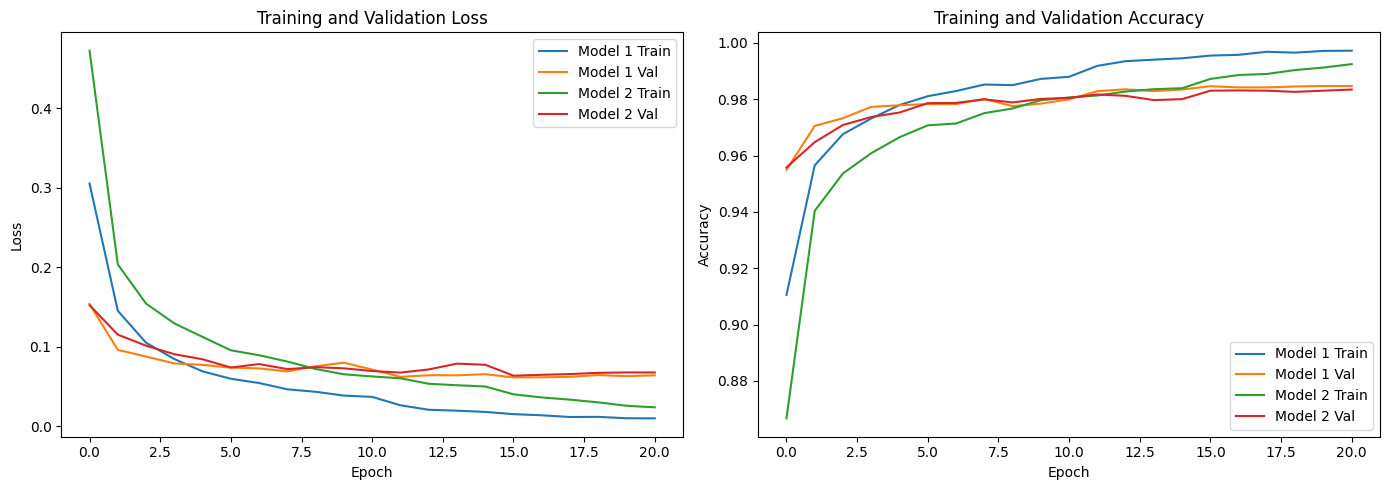

Model 1 - Test Accuracy: 0.9856, Test Loss: 0.0534
Model 2 - Test Accuracy: 0.9833, Test Loss: 0.0600


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# Compile and train function
def compile_and_train(model):
    optimizer = keras.optimizers.Adam()

    lr_scheduler = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-6
    )

    early_stop = keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=5, restore_best_weights=True
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[early_stop, lr_scheduler],
        verbose=1,
    )
    return history

# Model 1: With Dropout
model_1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(512),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

# Model 2: With Dropout + BatchNorm in deeper architecture
model_2 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(256),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(128),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(64),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(10, activation="softmax"),
])

# Train both models
history_3 = compile_and_train(model_1)
history_4 = compile_and_train(model_2)

# Plot training history
def plot_history(histories, names):
    plt.figure(figsize=(14, 5))

    # Loss
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Val")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Val")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history([history_3, history_4], ["Model 1", "Model 2"])

# Final evaluation
test_loss_3, test_acc_3 = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_4, test_acc_4 = model_2.evaluate(test_images, test_labels, verbose=0)
print(f"Model 1 - Test Accuracy: {test_acc_3:.4f}, Test Loss: {test_loss_3:.4f}")
print(f"Model 2 - Test Accuracy: {test_acc_4:.4f}, Test Loss: {test_loss_4:.4f}")
